<a href="https://colab.research.google.com/github/Sumanth-Mahabaleshwar-Bhat/AI-ML-Summer2022/blob/main/AI_ML_CourseProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import time
from numpy.linalg import eig
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
cols = ["Smartphone 1", "Smartphone 2", "Smartphone 3", "Smartphone 4", "Smartphone 5", "Smartphone 6", "Smartphone 7", "Room Number"]
data = pd.read_csv(r'wifi.csv', names = cols, index_col = False)
data.head()

,Smartphone 1,Smartphone 2,Smartphone 3,Smartphone 4,Smartphone 5,Smartphone 6,Smartphone 7,Room Number
0,-64,-56,-61,-66,-71,-82,-81,1
1,-68,-57,-61,-65,-71,-85,-85,1
2,-63,-60,-60,-67,-76,-85,-84,1
3,-61,-60,-68,-62,-77,-90,-80,1
4,-63,-65,-60,-63,-77,-81,-87,1


In [ ]:
df = data.iloc[:,0:7]
op = data.iloc[:, -1]
df.head()

,Smartphone 1,Smartphone 2,Smartphone 3,Smartphone 4,Smartphone 5,Smartphone 6,Smartphone 7
0,-64,-56,-61,-66,-71,-82,-81
1,-68,-57,-61,-65,-71,-85,-85
2,-63,-60,-60,-67,-76,-85,-84
3,-61,-60,-68,-62,-77,-90,-80
4,-63,-65,-60,-63,-77,-81,-87


# PCA


In [ ]:
df.mean().values

array([-52.3305, -55.6235, -54.964 , -53.5665, -62.6405, -80.985 ,
       -81.7265])

In [ ]:
df_mc = pd.DataFrame()
# mc = Mean centered

for i in range(len(df.columns)):
    array = np.array(df.iloc[:,i] - df.mean().values[i])
    df_mc[df.columns[i]] = array
df_mc.head()

,Smartphone 1,Smartphone 2,Smartphone 3,Smartphone 4,Smartphone 5,Smartphone 6,Smartphone 7
0,-11.6695,-0.3765,-6.036,-12.4335,-8.3595,-1.015,0.7265
1,-15.6695,-1.3765,-6.036,-11.4335,-8.3595,-4.015,-3.2735
2,-10.6695,-4.3765,-5.036,-13.4335,-13.3595,-4.015,-2.2735
3,-8.6695,-4.3765,-13.036,-8.4335,-14.3595,-9.015,1.7265
4,-10.6695,-9.3765,-5.036,-9.4335,-14.3595,-0.015,-5.2735


In [ ]:
df.std().values

array([11.32167655,  3.41768753,  5.31618613, 11.47198243,  9.10509259,
        6.51667158,  6.51981225])

In [ ]:
df_mcs = pd.DataFrame()
# mc = Mean centered scaled

for i in range(len(df_mc.columns)):
    array = np.array(df_mc.iloc[:,i] / df_mc.std().values[i])
    df_mcs[df_mc.columns[i]] = array
df_mcs.head()

,Smartphone 1,Smartphone 2,Smartphone 3,Smartphone 4,Smartphone 5,Smartphone 6,Smartphone 7
0,-1.030722,-0.110162,-1.135400,-1.083814,-0.918113,-0.155754,0.111430
1,-1.384026,-0.402758,-1.135400,-0.996646,-0.918113,-0.616112,-0.502085
2,-0.942396,-1.280544,-0.947296,-1.170983,-1.467256,-0.616112,-0.348706
3,-0.765743,-1.280544,-2.452134,-0.735139,-1.577084,-1.383375,0.264808
4,-0.942396,-2.743522,-0.947296,-0.822308,-1.577084,-0.002302,-0.808842


In [ ]:
df_mcs.mean()

Smartphone 1    4.263256e-17
Smartphone 2   -2.842171e-17
Smartphone 3   -2.842171e-16
Smartphone 4   -1.421085e-16
Smartphone 5    2.842171e-16
Smartphone 6    0.000000e+00
Smartphone 7    1.989520e-16
dtype: float64

In [ ]:
df_mcs.std()

Smartphone 1    1.0
Smartphone 2    1.0
Smartphone 3    1.0
Smartphone 4    1.0
Smartphone 5    1.0
Smartphone 6    1.0
Smartphone 7    1.0
dtype: float64

In [ ]:
# covariance matrix

X = df_mcs.to_numpy()
Xt = X.transpose()

XtX = np.dot(Xt, X)
df_XtX = pd.DataFrame(XtX)
df_XtX/1999.0

,0,1,2,3,4,5,6
0,1.000000,-0.003298,0.050814,0.921025,-0.244932,0.718429,0.686955
1,-0.003298,1.000000,0.282211,0.014604,0.200469,0.074002,0.048336
2,0.050814,0.282211,1.000000,0.078292,0.618984,-0.091622,-0.073141
3,0.921025,0.014604,0.078292,1.000000,-0.236021,0.706039,0.673294
4,-0.244932,0.200469,0.618984,-0.236021,1.000000,-0.416049,-0.361621
5,0.718429,0.074002,-0.091622,0.706039,-0.416049,1.000000,0.723172
6,0.686955,0.048336,-0.073141,0.673294,-0.361621,0.723172,1.000000


In [ ]:
eigen_Value, eigen_Vector = eig(XtX)
print('Eigen-value:\n', eigen_Value)
print('Eigen-vector:\n', eigen_Vector)

Eigen-value:
 [6787.68429243 3421.80053101 1741.77047985  155.95960672  741.76231514
  512.47144992  631.55132495]
Eigen-vector:
 [[-0.48948817  0.16468976  0.19791006 -0.71630001  0.41057236  0.10352193
   0.04169002]
 [ 0.00534144  0.42971465 -0.87398505 -0.01296522  0.20900505  0.07854757
   0.03802633]
 [ 0.07713055  0.6714255   0.24129382 -0.03120517 -0.32943421  0.16369837
  -0.59052363]
 [-0.48438445  0.18311678  0.19312126  0.69580645  0.43485981  0.14512339
  -0.01528574]
 [ 0.27160625  0.54881495  0.27858707  0.02857353  0.035565   -0.33069007
   0.66029099]
 [-0.47977075  0.02894363 -0.13116326  0.02263037 -0.25987816 -0.81040806
  -0.16422083]
 [-0.4645917   0.04293096 -0.08153934  0.0172405  -0.64908839  0.41126438
   0.43001331]]


In [ ]:
# principle components

pcs = eigen_Vector.transpose()

p1 = pcs[0]
p2 = pcs[1]
p3 = pcs[2]
p4 = pcs[3]
p5 = pcs[4]
p6 = pcs[5]
p7 = pcs[6]


print("p1: ", p1)
print("p2: ", p2)
print("p3: ", p3)
print("p4: ", p4)
print("p5: ", p5)
print("p6: ", p6)
print("p7: ", p7)

p1:  [-0.48948817  0.00534144  0.07713055 -0.48438445  0.27160625 -0.47977075
 -0.4645917 ]
p2:  [0.16468976 0.42971465 0.6714255  0.18311678 0.54881495 0.02894363
 0.04293096]
p3:  [ 0.19791006 -0.87398505  0.24129382  0.19312126  0.27858707 -0.13116326
 -0.08153934]
p4:  [-0.71630001 -0.01296522 -0.03120517  0.69580645  0.02857353  0.02263037
  0.0172405 ]
p5:  [ 0.41057236  0.20900505 -0.32943421  0.43485981  0.035565   -0.25987816
 -0.64908839]
p6:  [ 0.10352193  0.07854757  0.16369837  0.14512339 -0.33069007 -0.81040806
  0.41126438]
p7:  [ 0.04169002  0.03802633 -0.59052363 -0.01528574  0.66029099 -0.16422083
  0.43001331]


In [ ]:
t = np.dot(X,eigen_Vector)
print(t)

[[ 0.71493855 -1.68148729 -0.83541376 ... -0.60798115  0.017157
   0.10716066]
 [ 1.34999078 -1.88910661 -0.52237044 ... -0.25842381  0.0910107
  -0.10824651]
 [ 1.00767508 -2.39399143  0.17843458 ... -0.51743149  0.31794851
  -0.52826882]
 ...
 [ 2.44169006  1.37971051  1.64808107 ... -0.61268396 -0.32302525
  -0.03658382]
 [ 2.31371957  1.05903344  1.33261272 ... -0.19150391 -0.01715813
   1.19923501]
 [ 2.13180815  2.7631949  -0.46381358 ...  0.11438007  0.19273188
   0.04801259]]


In [ ]:
df_pca = pd.DataFrame(t, columns = cols[0:-1])
df_pca.head()

,Smartphone 1,Smartphone 2,Smartphone 3,Smartphone 4,Smartphone 5,Smartphone 6,Smartphone 7
0,0.714939,-1.681487,-0.835414,-0.006798,-0.607981,0.017157,0.107161
1,1.349991,-1.889107,-0.522370,0.289725,-0.258424,0.091011,-0.108247
2,1.007675,-2.393991,0.178435,-0.155456,-0.517431,0.317949,-0.528269
3,0.647267,-3.351619,-0.045527,0.058306,0.037637,1.063579,0.678377
4,0.720425,-3.021070,1.450805,0.108942,-0.536329,-0.396719,-0.960414


In [ ]:
def regressionClassificationType(type):
    for i in range(df_pca.shape[1]):
        print("Number of principle components: ", i+1)
        X_train, X_test, y_train, y_test = train_test_split(df_pca.iloc[:,:i+1], op, test_size = 0.25)
        if(type == "Logistic Regression"):
            logreg = LogisticRegression()
            logreg.fit(X_train, y_train)
            y_pred = logreg.predict(X_test)
            print('Accuracy of Logistic Regression Classifier on Test set: {}'.format(logreg.score(X_test, y_test)))
            print()
        elif(type == "Decision Tree"):
            clf_model = DecisionTreeClassifier(criterion="gini")
            clf_model.fit(X_train,y_train)
            y_pred = clf_model.predict(X_test)
            print('Accuracy of Decision Tree Classifier on Test set: {}'.format(clf_model.score(X_test, y_test)))
            print()

# PCA Logistic Regression

In [ ]:
regressionClassificationType("Logistic Regression")

Number of principle components:  1
Accuracy of Logistic Regression Classifier on Test set: 0.816

Number of principle components:  2
Accuracy of Logistic Regression Classifier on Test set: 0.93

Number of principle components:  3
Accuracy of Logistic Regression Classifier on Test set: 0.95

Number of principle components:  4
Accuracy of Logistic Regression Classifier on Test set: 0.978

Number of principle components:  5
Accuracy of Logistic Regression Classifier on Test set: 0.97

Number of principle components:  6
Accuracy of Logistic Regression Classifier on Test set: 0.978

Number of principle components:  7
Accuracy of Logistic Regression Classifier on Test set: 0.98



Training Time:  0.0363306999206543
Accuracy of Logistic Regression Classifier on Test set: 0.97
Testing Time:  0.005072832107543945
Confusion Matrix:
      0    1    2    3
0  133    0    0    0
1    0  116    6    0
2    3    5  121    1
3    0    0    2  113


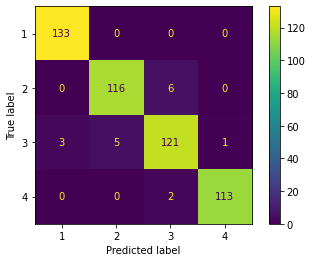

In [ ]:
start = time.time()
X_train, X_test, y_train, y_test = train_test_split(df_pca.iloc[:,:3], op, test_size = 0.25)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
stop = time.time()
print("Training Time: ", stop - start)
start = time.time()
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression Classifier on Test set: {:.2f}'.format(logreg.score(X_test, y_test)))
stop = time.time()
print("Testing Time: ", stop - start)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", pd.DataFrame(confusion_matrix))
plot_confusion_matrix(logreg, X_test, y_test)

# PCA Decision Tree

In [ ]:
regressionClassificationType("Decision Tree")

Number of principle components:  1
Accuracy of Decision Tree Classifier on Test set: 0.748

Number of principle components:  2
Accuracy of Decision Tree Classifier on Test set: 0.896

Number of principle components:  3
Accuracy of Decision Tree Classifier on Test set: 0.948

Number of principle components:  4
Accuracy of Decision Tree Classifier on Test set: 0.944

Number of principle components:  5
Accuracy of Decision Tree Classifier on Test set: 0.962

Number of principle components:  6
Accuracy of Decision Tree Classifier on Test set: 0.932

Number of principle components:  7
Accuracy of Decision Tree Classifier on Test set: 0.948



Training Time:  0.007017612457275391
Accuracy of Decision Tree classifier on test set: 0.948
Testing Time:  0.0031337738037109375
Confusion Matrix:
 [[122   0   5   0]
 [  0 118   2   0]
 [  3   9 105   3]
 [  0   0   4 129]]


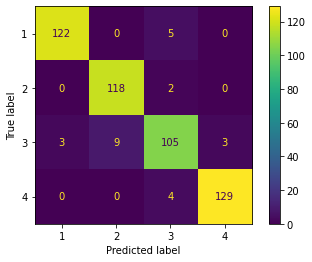

In [ ]:
start = time.time()
X_train, X_test, y_train, y_test = train_test_split(df_pca.iloc[:,:3], op, test_size = 0.25)
clf_model = DecisionTreeClassifier(criterion="gini")
clf_model.fit(X_train,y_train)
stop = time.time()
print("Training Time: ", stop - start)
from sklearn.metrics import confusion_matrix
start = time.time()
y_pred = clf_model.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: ', end='')
print(accuracy_score(y_test,y_pred))
stop = time.time()
print("Testing Time: ", stop - start)
confusion_Matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_Matrix)
plot_confusion_matrix(clf_model, X_test, y_test)

# Feature selection

In [ ]:
features = pd.DataFrame(df)
removed_index = []
features.head()

,Smartphone 1,Smartphone 2,Smartphone 3,Smartphone 4,Smartphone 5,Smartphone 6,Smartphone 7
0,-64,-56,-61,-66,-71,-82,-81
1,-68,-57,-61,-65,-71,-85,-85
2,-63,-60,-60,-67,-76,-85,-84
3,-61,-60,-68,-62,-77,-90,-80
4,-63,-65,-60,-63,-77,-81,-87


In [ ]:
for i in range(7):
    accuracy = []
    for i in range(7):
        if i in removed_index:
            print("Already Removed... Hence, Accuracy = 0")
            accuracy.append(0)
            continue

        x = features.drop(features.columns[i],axis=1)
        X_train, X_test, y_train, y_test = train_test_split(x, op, test_size = 0.25)
        logreg = LogisticRegression()
        logreg.fit(X_train, y_train)
        y_pred = logreg.predict(X_test)
        accuracy.append(logreg.score(X_test, y_test))
        print('Accuracy of logistic regression classifier on test set: {}'.format(accuracy[i]))
    max_index = np.argmax(accuracy)
    print()
    removed_index.append(max_index)
    print(removed_index)

Accuracy of logistic regression classifier on test set: 0.946
Accuracy of logistic regression classifier on test set: 0.978
Accuracy of logistic regression classifier on test set: 0.986
Accuracy of logistic regression classifier on test set: 0.976
Accuracy of logistic regression classifier on test set: 0.958
Accuracy of logistic regression classifier on test set: 0.98
Accuracy of logistic regression classifier on test set: 0.972

[2]
Accuracy of logistic regression classifier on test set: 0.956
Accuracy of logistic regression classifier on test set: 0.966
Already Removed... Hence, Accuracy = 0
Accuracy of logistic regression classifier on test set: 0.976
Accuracy of logistic regression classifier on test set: 0.932
Accuracy of logistic regression classifier on test set: 0.972
Accuracy of logistic regression classifier on test set: 0.98

[2, 6]
Accuracy of logistic regression classifier on test set: 0.96
Accuracy of logistic regression classifier on test set: 0.96
Already Removed... Hen

In [ ]:
significant_features = removed_index[::-1]
significant_features

[4, 0, 1, 5, 3, 6, 2]

In [ ]:
df_fs = pd.DataFrame()
for i in significant_features:
    df_fs = pd.concat([df_fs,features.iloc[: , i]], axis = 1)
df_fs.head()

,Smartphone 5,Smartphone 1,Smartphone 2,Smartphone 6,Smartphone 4,Smartphone 7,Smartphone 3
0,-71,-64,-56,-82,-66,-81,-61
1,-71,-68,-57,-85,-65,-85,-61
2,-76,-63,-60,-85,-67,-84,-60
3,-77,-61,-60,-90,-62,-80,-68
4,-77,-63,-65,-81,-63,-87,-60


# Feature Selection Logistic Regression

In [ ]:
for i in range(7):
    print( "Number of principle components: ", i+1)
    X_train, X_test, y_train, y_test = train_test_split(df_fs.iloc[:,:i+1], op, test_size = 0.25)
    logreg = LogisticRegression()
    logreg.fit(X_train, y_train)
    y_pred = logreg.predict(X_test)
    print('Accuracy of Logistic Regression Classifier on test set: {}'.format(logreg.score(X_test, y_test)))
    print()

Number of principle components:  1
Accuracy of Logistic Regression Classifier on test set: 0.614

Number of principle components:  2
Accuracy of Logistic Regression Classifier on test set: 0.958

Number of principle components:  3
Accuracy of Logistic Regression Classifier on test set: 0.954

Number of principle components:  4
Accuracy of Logistic Regression Classifier on test set: 0.97

Number of principle components:  5
Accuracy of Logistic Regression Classifier on test set: 0.968

Number of principle components:  6
Accuracy of Logistic Regression Classifier on test set: 0.974

Number of principle components:  7
Accuracy of Logistic Regression Classifier on test set: 0.98



Training Time:  0.21881532669067383
Accuracy of Logistic Regression Classifier on test set: 0.96
Testing Time:  0.016811847686767578
Confusion Matrix:
      0    1    2    3
0  124    0    0    2
1    0  100   12    0
2    0    4  118    0
3    0    0    0  140


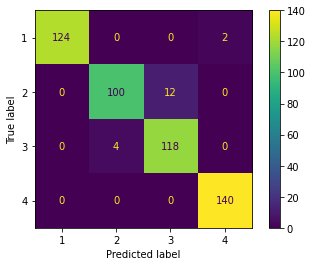

In [ ]:
start = time.time()
X_train, X_test, y_train, y_test = train_test_split(df_fs.iloc[:,:2], op, test_size = 0.25)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
stop = time.time()
print("Training Time: ", stop - start)
start = time.time()
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
stop = time.time()
print("Testing Time: ", stop - start)
confusion_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", pd.DataFrame(confusion_matrix))
plot_confusion_matrix(logreg, X_test, y_test)

# Feature Selection Decision Tree

In [ ]:
for i in range(7):
    print( "no. of principle components: ", i+1)
    X_train, X_test, y_train, y_test = train_test_split(df_fs.iloc[:,:i+1], op, test_size = 0.25)
    decTree = DecisionTreeClassifier(criterion="gini")
    decTree.fit(X_train,y_train)
    y_pred = decTree.predict(X_test)
    print('Accuracy of Decision Tree classifier on test set: ', end='')
    print(accuracy_score(y_test,y_pred))
    print()

no. of principle components:  1
Accuracy of Decision Tree classifier on test set: 0.652

no. of principle components:  2
Accuracy of Decision Tree classifier on test set: 0.952

no. of principle components:  3
Accuracy of Decision Tree classifier on test set: 0.954

no. of principle components:  4
Accuracy of Decision Tree classifier on test set: 0.962

no. of principle components:  5
Accuracy of Decision Tree classifier on test set: 0.978

no. of principle components:  6
Accuracy of Decision Tree classifier on test set: 0.976

no. of principle components:  7
Accuracy of Decision Tree classifier on test set: 0.972



Training Time:  0.018146276473999023
Accuracy of Decision Tree classifier on test set: 0.95
Testing Time:  0.02365899085998535
Confusion Matrix:
 [[111   0   0   0]
 [  0 122   7   0]
 [  3  10 119   2]
 [  3   0   0 123]]


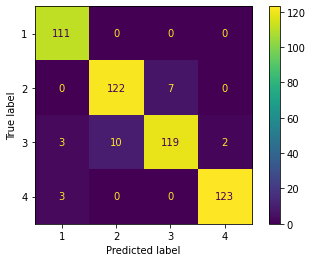

In [ ]:
start = time.time()
X_train, X_test, y_train, y_test = train_test_split(df_fs.iloc[:,:2], op, test_size = 0.25)
clf_model = DecisionTreeClassifier(criterion="gini")
clf_model.fit(X_train,y_train)
stop = time.time()
print("Training Time: ", stop - start)
from sklearn.metrics import confusion_matrix
start = time.time()
y_pred = clf_model.predict(X_test)
print('Accuracy of Decision Tree classifier on test set: ', end='')
print(accuracy_score(y_test,y_pred))
stop = time.time()
print("Testing Time: ", stop - start)
confusion_Matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", confusion_Matrix)
plot_confusion_matrix(clf_model, X_test, y_test)